In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
data = pd.read_csv('data/SMSSpamCollection.tsv', delimiter="\t")
data.head()

,status,body
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.head(50)

,status,body
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


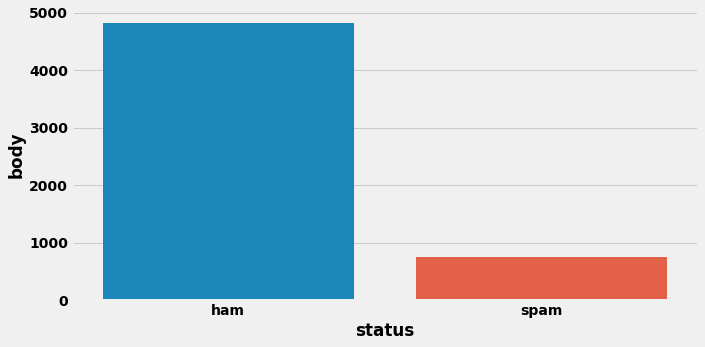

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))

df_2 = data.groupby('status').count()
df_2.reset_index(inplace=True)
sns.barplot(x='status', y='body', data=df_2);

In [5]:
train_x, test_x, train_y, test_y = train_test_split(data["body"], data["status"])

In [6]:
train_y.head()

3894     ham
592     spam
4221     ham
3741     ham
3276     ham
Name: status, dtype: object

In [7]:
train_x.head()

3894                       Have you heard from this week?
592     You have been specially selected to receive a ...
4221    U free on sat rite? U wan 2 watch infernal aff...
3741              No da. . Vijay going to talk in jaya tv
3276    Hurry home u big butt. Hang up on your last ca...
Name: body, dtype: object

In [8]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train_x = vectorizer.fit_transform(train_x)

In [9]:
index_value={i[1]:i[0] for i in vectorizer.vocabulary_.items()}
fully_indexed = []
for row in tfidf_train_x:
    fully_indexed.append({index_value[column]:value for (column,value) in zip(row.indices,row.data)})

In [10]:
tfidf_train_x

<4179x7117 sparse matrix of type '<class 'numpy.float64'>'
	with 32619 stored elements in Compressed Sparse Row format>

In [11]:
classifier = GaussianNB()
classifier.fit(tfidf_train_x.toarray(), train_y)

GaussianNB()

In [12]:
tfidf_test_x = vectorizer.transform(test_x)
print(tfidf_test_x.shape)
scores = cross_val_score(classifier, tfidf_test_x.toarray(), test_y, cv=5)
acc = scores.mean()
print("Accuracy: %0.2f percent" % (acc *100))

(1393, 7117)
Accuracy: 87.44 percent


In [13]:
mess = ['Please gas up my car', "You won the lottery, claim it now!!!", "Where did my dog go?", "30% of on SMAC purchases"]
output = classifier.predict(vectorizer.transform(mess).toarray())

for i ,m in enumerate(mess):
    print(m, ' == ', output[i])

Please gas up my car  ==  ham
You won the lottery, claim it now!!!  ==  spam
Where did my dog go?  ==  ham
30% of on SMAC purchases  ==  ham
